In [10]:
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
from talib import abstract
import mplfinance as mpf
#import goo_doc_api as goo
#import yfinance as yf
#import pandas_datareader as web
import matplotlib
#matplotlib.use('ps')
from matplotlib import rc
#rc('text',usetex=True)
# rc('text.latex', preamble='\usepackage{color}')
import matplotlib.pyplot as plt

import datetime
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import io
import sklearn
from sklearn.cluster import KMeans


In [66]:
tickers=["AAPL"] # ,"CS"
for i in  tickers:

    # download stock price data
    Stock_Name= i
    symbol = i
    tickers = symbol
    #df = yf.download(symbol, period='6mo')
    dir_path = r"C:\D\Ryan\TAMU_class\STAT654\Project\stock_market_data\nasdaq\csv"+'\\'

    df = pd.read_csv(dir_path+str(Stock_Name)+".csv", parse_dates=['Date'], dayfirst=True)
    
    #df= pd.read_csv(dir_path+str(Stock_Name)+".csv")  # C:\D\Ryan\TAMU_class\STAT654\Project\stock_market_data\nasdaq\csv
    # current_price = web.get_quote_yahoo(tickers)["regularMarketPrice"]
    # print(current_price)
    df.set_index('Date', inplace=True)
    df=df[:'20240101']  # '20100101'
    #df.reset_index(inplace=True)
    # Add MACD as subplot


    #macd = MACD(df, 12, 26, 9)
    #stochastic = Stochastic(df, 14, 3)

In [67]:
df

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
...,...,...,...,...,...,...
2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994


In [68]:
#result

In [69]:
# https://towardsdatascience.com/sliding-windows-in-pandas-40b79edefa34
# sliding window


# window_size = '120D'
# sliding_window = df.rolling(window=window_size).mean()


In [70]:
# create sliding windows in pandas
res = pivot.resample(interval_size).sum()
windows = res.rolling(window_size).sum()

NameError: name 'pivot' is not defined

In [ ]:
res_1m = res.resample('1min').sum()
res_1m.head(3)
windows = res_1m.rolling(5).sum()
windows.head()
windows_drop = windows.iloc[4:]
windows_drop.head()
# create custom window indexer
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

# use indexer to create rolling window
windows_f = res_1m.rolling(window=indexer).sum()

windows_f.head()


# drop the last 14 columns
windows_f_drop = windows.iloc[:45]
windows_f_drop.tail()

NameError: name 'res' is not defined

In [71]:
df

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
...,...,...,...,...,...,...
2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994


In [96]:
def sliding_window_iter(series, window_size, step_size):
    """series is a column of a dataframe"""
    for start_row in range((len(series) -window_size )//step_size  +1):  ## cannot plus 2
        raw_data=series[start_row* step_size   :   start_row* step_size      + window_size]
        
        yield (raw_data-raw_data.min())/(raw_data.max()-raw_data.min())
# 'C': [0, 1, 2, None, 4]},
# df = pd.DataFrame({'A': list(range(100, 501, 100)),
#                    'B': list(range(-20, -15)),},
                   
#                   index=pd.date_range('2021-01-01', periods=))

# 238 rows × 6 columns
slice_data=list(sliding_window_iter(df['Adjusted Close'], 120,5))  ## remove timestamp
timeless_slice_data=[x.reset_index(drop=True) for x in slice_data]
if 0:  # check timestamp window is correct
    print("first window", slice_data[0].index[0],slice_data[0].index[-1])
    print("2nd window", slice_data[1].index[0],slice_data[1].index[-1])
    print("final window", slice_data[-1].index[0],slice_data[-1].index[-1])

print(len(slice_data[-1]))  ## check the length of the last window
print(len(slice_data))  ## total window number

timeless_slice_data
## concat list to dataframe  to mulitpe columns and drop index 

df_window=pd.concat(timeless_slice_data, axis=1)


120
2095


In [97]:
df_window

,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,...,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close,Adjusted Close
0,0.495653,0.460872,1.000000,0.923918,0.771753,0.891314,0.902181,0.521749,0.489141,0.489141,...,0.829250,0.592634,0.652457,0.546583,0.428772,0.230258,0.416924,0.400157,0.120047,0.075640
1,0.391311,0.556518,0.939135,0.804361,0.782623,0.945657,0.815230,0.608700,0.413059,0.347826,...,0.825455,0.587500,0.798445,0.367518,0.240542,0.233835,0.472811,0.281228,0.000000,0.161439
2,0.252174,0.643485,0.869574,0.750017,0.836967,0.978263,0.717410,0.608700,0.391301,0.228268,...,0.807375,0.745318,0.591964,0.279439,0.162969,0.306712,0.342481,0.158051,0.033533,0.161439
3,0.295650,0.756522,0.895660,0.891314,0.815230,0.967394,0.576093,0.619569,0.336957,0.260874,...,0.704022,0.611607,0.608507,0.381155,0.168334,0.437714,0.359471,0.040686,0.129883,0.054634
4,0.347836,0.965219,0.843488,0.869575,0.978263,0.923918,0.434796,0.489141,0.391301,0.184791,...,0.728353,0.618527,0.491813,0.346057,0.291735,0.419830,0.416924,0.060359,0.118259,0.099937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.799996,0.695657,0.756522,0.750017,0.652176,0.282612,0.097840,0.217399,0.293480,0.271743,...,0.281403,0.235959,0.280508,0.438107,0.525189,0.207539,0.417421,0.411367,0.257992,0.204108
116,0.799996,0.617400,0.747827,0.652176,0.565224,0.304350,0.184791,0.206530,0.217399,0.304350,...,0.363113,0.203724,0.310506,0.502803,0.464970,0.220545,0.456886,0.460026,0.411816,0.154097
117,0.686961,0.660876,0.704350,0.695651,0.380432,0.391301,0.239137,0.086951,0.184791,0.369564,...,0.369829,0.189396,0.312968,0.435868,0.339160,0.116725,0.428857,0.479983,0.418094,0.197507
118,0.686961,0.686961,0.669571,0.630438,0.358695,0.217399,0.293480,0.141315,0.260874,0.315219,...,0.348114,0.293492,0.302447,0.334011,0.201485,0.385804,0.472134,0.413610,0.406882,0.185068


In [73]:
slice_data

[Date
 1980-12-12    0.495653
 1980-12-15    0.391311
 1980-12-16    0.252174
 1980-12-17    0.295650
 1980-12-18    0.347836
                 ...   
 1981-05-29    0.799996
 1981-06-01    0.799996
 1981-06-02    0.686961
 1981-06-03    0.686961
 1981-06-04    0.730437
 Name: Adjusted Close, Length: 120, dtype: float64,
 Date
 1980-12-19    0.460872
 1980-12-22    0.556518
 1980-12-23    0.643485
 1980-12-24    0.756522
 1980-12-26    0.965219
                 ...   
 1981-06-05    0.695657
 1981-06-08    0.617400
 1981-06-09    0.660876
 1981-06-10    0.686961
 1981-06-11    0.782607
 Name: Adjusted Close, Length: 120, dtype: float64,
 Date
 1980-12-29    1.000000
 1980-12-30    0.939135
 1980-12-31    0.869574
 1981-01-02    0.895660
 1981-01-05    0.843488
                 ...   
 1981-06-12    0.756522
 1981-06-15    0.747827
 1981-06-16    0.704350
 1981-06-17    0.669571
 1981-06-18    0.660876
 Name: Adjusted Close, Length: 120, dtype: float64,
 Date
 1981-01-06    0.923918
 198

In [74]:
# other option tslearn https://tslearn.readthedocs.io/en/stable/user_guide/clustering.html
num_clusters =20
clusterer = KMeans(n_clusters=num_clusters )
model=clusterer.fit(slice_data)


print (model.labels_ , len(model.labels_ ))
# cluster_labels = clusterer.fit_predict(slice_data)

# # Plot the clustered time series
# plt.figure(figsize=(12, 6))
# for i in range(num_clusters):
#     plt.plot(np.mean(slice_data[cluster_labels == i], axis=0), label=f'Cluster {i+1}')
# plt.legend()
# plt.title('Clustered Time Series')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.show()

c:\D\Ryan\TAMU_class\STAT654\Project\stat_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 4  4  7 ... 18 14 14] 2095


In [75]:
## create color list of number 20 from sns 
import seaborn as sns
colors = sns.color_palette("hls", num_clusters)
print(colors)

labels=np.array(model.labels_).reshape(-1)
labels


[(0.86, 0.3712, 0.33999999999999997), (0.86, 0.5272, 0.33999999999999997), (0.86, 0.6832, 0.33999999999999997), (0.86, 0.8392000000000002, 0.33999999999999997), (0.7247999999999999, 0.86, 0.33999999999999997), (0.5688000000000001, 0.86, 0.33999999999999997), (0.41279999999999994, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.42320000000000013), (0.33999999999999997, 0.86, 0.5792000000000002), (0.33999999999999997, 0.86, 0.7352000000000001), (0.33999999999999997, 0.8287999999999999, 0.86), (0.33999999999999997, 0.6727999999999997, 0.86), (0.33999999999999997, 0.5167999999999995, 0.86), (0.33999999999999997, 0.36079999999999973, 0.86), (0.4752000000000003, 0.33999999999999997, 0.86), (0.6311999999999998, 0.33999999999999997, 0.86), (0.7871999999999999, 0.33999999999999997, 0.86), (0.86, 0.33999999999999997, 0.7767999999999993), (0.86, 0.33999999999999997, 0.6207999999999999), (0.86, 0.33999999999999997, 0.46479999999999977)]


array([ 4,  4,  7, ..., 18, 14, 14])

0


ValueError: x and y must have same first dimension, but have shapes (120,) and (1,)

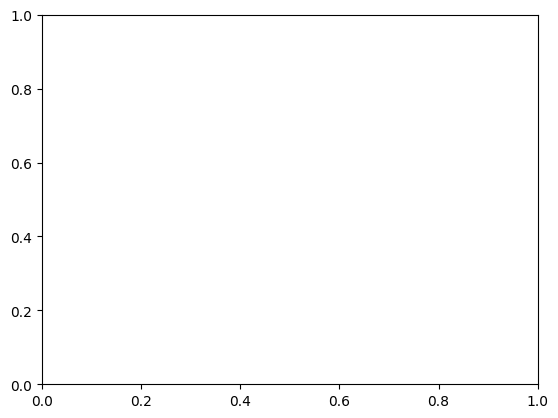

In [85]:
for j in range(1): # range(num_clusters):
    print(j)
    for i in np.where(labels==j)[0]: 
        #for i in group_array:
    #group_array
        #print(i)


        #plt.plot(range(0,120),slice_data[i] ,color=colors[j]) # label=f'Cluster {i+1}'
        plt.plot(range(0,120),slice_data[i].mean() ,color='black') # label=f'Cluster {i+1}'
    plt.show()